# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [31]:
## 超參數設定
"""
Set your required experiment parameters
"""
from keras import optimizers
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95]
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
sgd = optimizers.SGD(lr=0.01, clipnorm=1)
adam =  optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
Optimizers = [optimizers.Adagrad, optimizers.SGD, optimizers.Adam, optimizers.RMSprop ]
#Optimizers.append(sgd)
#Optimizers.append(rmsprop)
#Optimizers.append(adam)
#Optimizers.append(adagrad)

In [32]:
train.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [33]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for mmt in MOMENTUM:
    for optimizer in Optimizers:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %s" % (str(optimizer)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #optimizer = rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer())

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % (str(optimizer))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.0638 - acc: 0.2648 - val_loss: 1.9450 - val_acc: 0.3086
Epoch 2/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8842 - acc: 0.3398 - val_loss: 1.8526 - val_acc: 0.3514
Epoch 3/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8097 - acc: 0.3620 - val_loss: 1.7894 - val_acc: 0.3668
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.7660 - acc: 0.3802 - val_loss: 1.7779 - val_acc: 0.3678
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.7236 - acc: 0.3921 - val_loss: 1.7352 - val_acc: 0.3711
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6936 - acc: 0.4042 - val_loss: 1.7099 - val_acc: 0.3970
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6698 - acc: 0.4131 - val_loss: 1.7280 - val

50000/50000 [==============================] - 8s 166us/step - loss: 1.9426 - acc: 0.2995 - val_loss: 1.7650 - val_acc: 0.3757
Epoch 2/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.7155 - acc: 0.3889 - val_loss: 1.6626 - val_acc: 0.4015
Epoch 3/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.6153 - acc: 0.4233 - val_loss: 1.6098 - val_acc: 0.4255
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5532 - acc: 0.4462 - val_loss: 1.5720 - val_acc: 0.4343
Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5024 - acc: 0.4677 - val_loss: 1.4861 - val_acc: 0.4697
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4605 - acc: 0.4793 - val_loss: 1.5163 - val_acc: 0.4547
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4296 - acc: 0.4902 - val_loss: 1.5251 - val_acc: 0.4665
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 146us/step - loss: 1.8916 - acc: 0.3166 - val_loss: 1.7773 - val_acc: 0.3640
Epoch 3/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.7898 - acc: 0.3587 - val_loss: 1.7785 - val_acc: 0.3527
Epoch 4/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.7234 - acc: 0.3823 - val_loss: 1.7497 - val_acc: 0.3691
Epoch 5/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6598 - acc: 0.4052 - val_loss: 1.7623 - val_acc: 0.3594
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.6188 - acc: 0.4188 - val_loss: 1.6588 - val_acc: 0.4033
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5779 - acc: 0.4360 - val_loss: 1.6368 - val_acc: 0.4149
Epoch 8/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5415 - acc: 0.4479 - val_loss: 1.6330 - val_acc: 0.4215
Epoch 9/50
50000/50000 [=====================

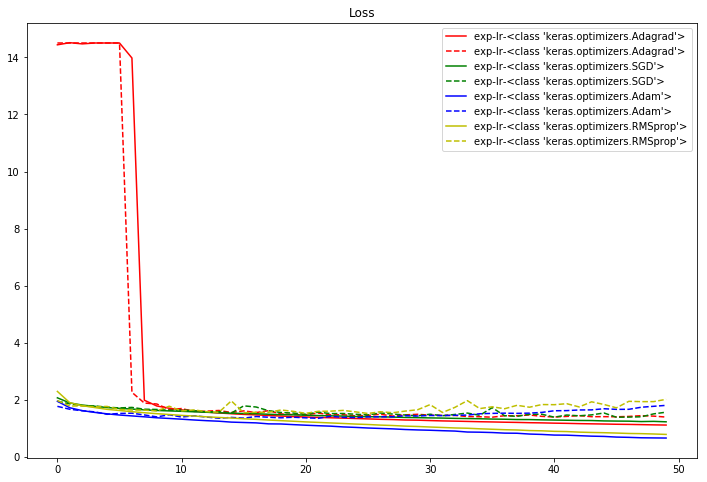

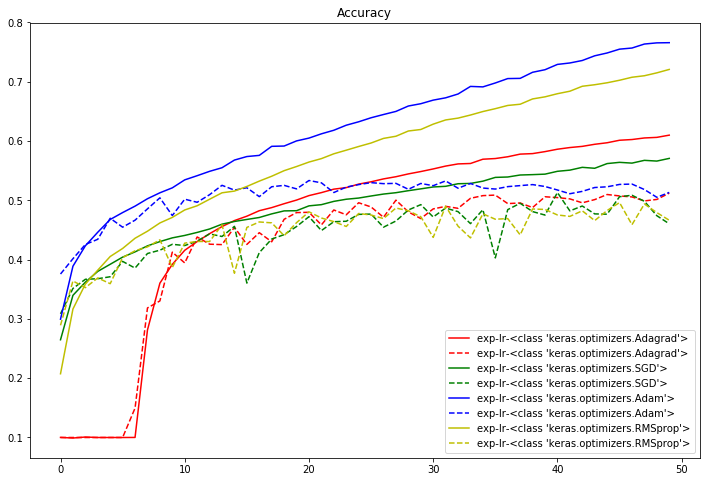

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(12,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()